In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA       


In [4]:
train = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/train.csv")
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428


In [239]:
train['sub_id'] = train['month_id'].astype(str) + train['merchant_id'].astype(str)
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106,202307merchant_43992
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918,202301merchant_43992
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452,202305merchant_43992
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787,202308merchant_43992
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428,202302merchant_43992


In [5]:
sub = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/sample_submission.csv")
sub.head()

,id,net_payment_count
0,202311merchant_36004,0
1,202312merchant_36004,0
2,202310merchant_36004,0
3,202311merchant_23099,0
4,202312merchant_23099,0


In [6]:
train["month_id"] = pd.to_datetime(train["month_id"], format="%Y%m")

train = train.sort_values(by='month_id')
train['month_id'] = train['month_id'].astype('datetime64[ns]')

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291142 entries, 63650 to 291141
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   merchant_id           291142 non-null  object        
 1   month_id              291142 non-null  datetime64[ns]
 2   merchant_source_name  291142 non-null  object        
 3   settlement_period     291142 non-null  object        
 4   working_type          291142 non-null  object        
 5   mcc_id                291142 non-null  object        
 6   merchant_segment      291142 non-null  object        
 7   net_payment_count     291142 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 20.0+ MB


In [ ]:
#train.index = pd.to_period(train.index, freq='M')

#train.index = pd.to_datetime(train.index)
#month_index = train.index.to_period('M')

#train.index.to_period("M")
#train_index = train['month_id'].strftime('%Y-%m')

In [7]:
train['month_id']=pd.to_datetime(train['month_id'])
train.set_index('month_id', inplace=True)

train.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

In [8]:
train[["merchant","id"]] = train["merchant_id"].str.split("_", expand=True)


In [9]:
train.drop(['merchant_id','merchant'], axis=1, inplace=True)
train.head()

,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,id
month_id,,,,,,,
2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_130,Segment - 4,6,66740
2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_153,Segment - 4,3,12444
2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_168,Segment - 4,3,40154
2020-01-01,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_25,Segment - 2,787,33179
2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_31,Segment - 4,5,16977


In [14]:
result = train.sort_values(by=['id'])
result.head()

,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,id
month_id,,,,,,,
2022-10-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,1
2021-08-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,1
2022-03-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,9,10
2021-11-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,6,10
2022-04-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,4,10


In [ ]:
result = train.groupby('id')
result.describe()

In [15]:
ts = pd.DataFrame({"net_payment_count":result['net_payment_count'],
                  "id":result['id']
                  })
ts.head()

,net_payment_count,id
month_id,,
2022-10-01,3,1
2021-08-01,3,1
2022-03-01,9,10
2021-11-01,6,10
2022-04-01,4,10


<Axes: xlabel='month_id'>

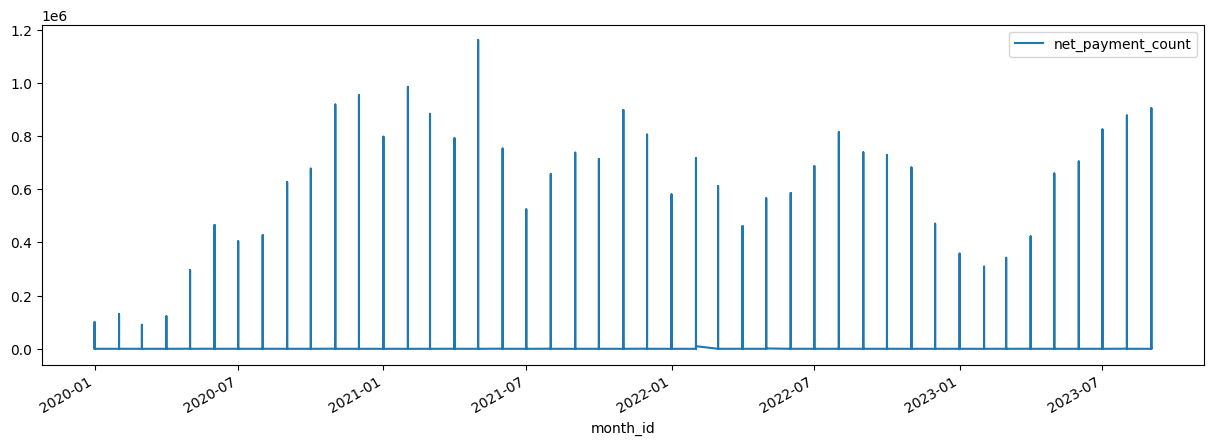

In [16]:
ts.plot(figsize=(15,5))


In [17]:
ts.index.sort_values()

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

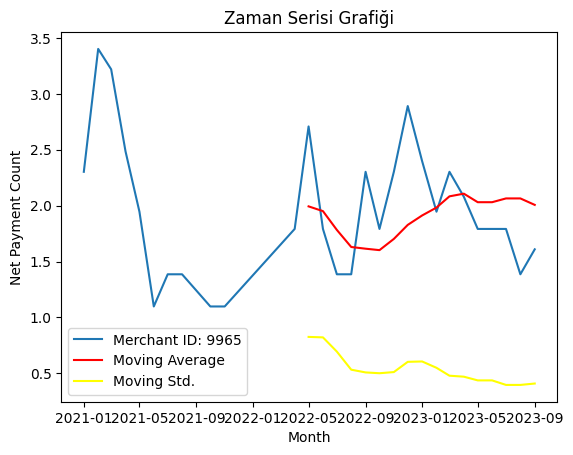

In [18]:
def plot_merchant(ts, id):
    data = ts[ts['id'] == id]
    merchant_data = data.sort_values(by=['month_id'])

    
    ts_log = np.log(merchant_data['net_payment_count'])
    moving_avg = ts_log.rolling(12).mean()
    moving_std = ts_log.rolling(12).std()
    #plt.plot(ts, color='red')
    plt.plot(ts_log, label=f'Merchant ID: {id}')
    plt.plot(moving_avg, color='red', label='Moving Average')
    plt.plot(moving_std, color='yellow', label='Moving Std.')

    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('Zaman Serisi Grafiği')

    plt.show()


plot_merchant(ts,'9965')

In [43]:
data = ts[ts['id'] == '10059']
merchant_data = data.sort_values(by=['month_id'])
data
ts_log = np.log(merchant_data['net_payment_count'])
data


,net_payment_count,id
month_id,,
2021-03-01,28,10059
2021-11-01,3,10059
2021-05-01,4,10059
2021-06-01,8,10059
2021-04-01,11,10059
2021-07-01,3,10059


In [33]:
import pmdarima as pm

model = pm.auto_arima(ts_log, 
                    m=12,               # frequency of series                      
                    seasonal=False,  # TRUE if seasonal series
                    d=None,             # let model determine 'd'
                    test='adf',         # use adftest to find optimal 'd'
                    start_p=0, start_q=0, # minimum p and q
                    max_p=3, max_q=3,   # maximum p and q
                    D=None,             # let model determine 'D'
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)
print(model.summary())

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78.486, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.067, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=79.195, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=76.687, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.121 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   45
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -37.344
Date:                Sat, 10 Feb 2024   AIC                             76.687
Time:                        22:09:31   BIC                             78.471
Sample:                             0   HQIC                            77.349
                                 - 45                                         
Covariance

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for Merchant ID 33179:

                 Forecast
2023-10-01  543291.471902
2023-11-01  581395.709094
2023-12-01  561118.250807


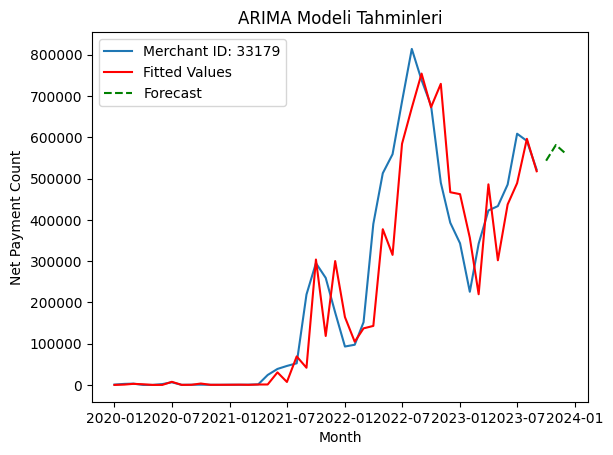

In [41]:
def forecast_merchant(ts, merchant_id, forecast_periods=3):
    data = ts[ts['id'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])
 
    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(2, 1, 1))  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=forecast_periods)

    # Tahminleri indeks ile eşleştirin
    forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {merchant_id}:\n")
    print(forecast_df)

    # Grafik üzerinde gösterim
    plt.plot(merchant_data.net_payment_count, label=f'Merchant ID: {merchant_id}')
    plt.plot(np.exp(results_ARIMA.fittedvalues), color='red', label='Fitted Values')
    plt.plot(forecast_df, color='green', linestyle='--', label='Forecast')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('ARIMA Modeli Tahminleri')

    plt.show()

# Belirli bir 'id' için 3 aylık tahmin yapın
forecast_merchant(ts, '33179', forecast_periods=3)

In [ ]:
def forecast_merchant(ts, merchant_id, forecast_periods=3):
    data = ts[ts['id'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(2, 1, 1))  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=forecast_periods)

    # Tahminleri indeks ile eşleştirin
    forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {merchant_id}:\n")
    print(forecast_df)

    # Grafik üzerinde gösterim
    plt.plot(ts_log, label=f'Merchant ID: {merchant_id}')
    plt.plot(np.exp(results_ARIMA.fittedvalues), color='red', label='Fitted Values')
    plt.plot(forecast_df, color='green', linestyle='--', label='Forecast')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('ARIMA Modeli Tahminleri')

    plt.show()

# Belirli bir 'id' için 3 aylık tahmin yapın
forecast_merchant(ts, '33179', forecast_periods=3)

In [ ]:
merchant_data = ts[ts['id'] == '33179'].sort_values(by=['month_id'])
merchant_data.head()


/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/U

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

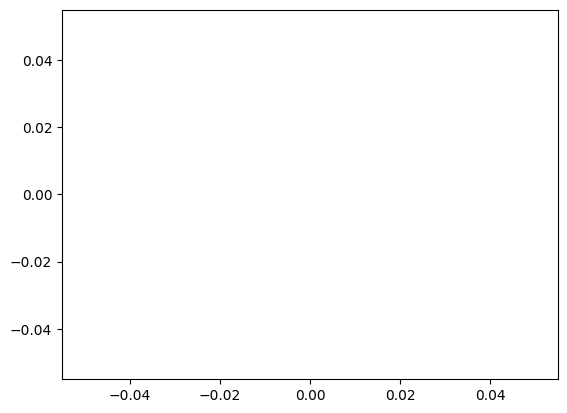

In [242]:
forecast_periods=3
# Tüm ayları içeren bir zaman serisi oluşturun
#full_date_range = pd.date_range(start='2020-01-01', end='2023-07-01', freq='MS')
forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]

full_ts = pd.DataFrame(index=forecast_index)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

# Eksik verileri doldurun (örneğin, forward fill)
df_full_filled = df_full.ffill()

# Belirli bir 'id' için veriyi seçin
merchant_id = 33179
merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
start_date = df_full_filled.index[-3]  # 2023'ün son 3 ayı
end_date = df_full_filled.index[-1]
predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = predictions.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Tahminleri DataFrame olarak oluşturun
prediction_df = pd.DataFrame({
    'Actual_Data': df_full_filled[df_full_filled['id'] == merchant_id]['net_payment_count'][-3:].values
}, index=ts_log.index[-3:])

# Tahminleri göster
print(prediction_df)

In [227]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

merchant_data = ts[ts['id'] == '33179']

data = merchant_data['net_payment_count']
seasonal = True

model = pm.auto_arima(data, 
                      m=12,               # frequency of series                      
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3,   # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

#print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1257.380, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1255.136, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1249.738, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1233.400, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1253.184, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1231.933, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1233.045, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1233.959, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1236.198, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1248.102, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1234.853, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1227.227, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1228.777, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]

In [ ]:
model.summary()


/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py:911: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


AttributeError: module 'pandas' has no attribute 'rolling_mean'

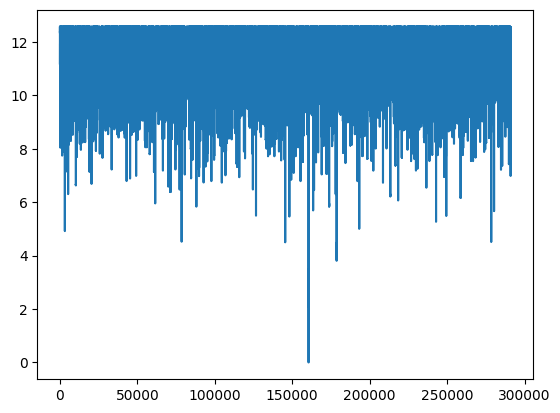

In [236]:

#This block worked as expected and created a simple time series'able data frame for me
ts_TS = ts.index

#tested for stationarity (it was not stationary). not including code for brevity

#There is clearly an upward trend in the line chart, which breaks stationarity rules. So lets transform with log
TS_log = np.log(ts_TS)
plt.plot(TS_log)

#In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.
moving_avg = pd.rolling_mean(TS_log,12)
plt.plot(TS_log)
plt.plot(moving_avg, color='red')

#The red line above shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values
homepriceTS_log_moving_avg_diff = TS_log - moving_avg
homepriceTS_log_moving_avg_diff.head(n=12)

#Drop the first 11 NaN rows since we chose a 12 month roll. Then we'll test for stationarity again.
homepriceTS_log_moving_avg_diff.dropna(inplace=True)
homepriceTS_log_moving_avg_diff.head()

#tested for stationarity again. It was much better, so I'll go with it.

homepriceTS_log_diff = TS_log - TS_log.shift()
plt.plot(homepriceTS_log_diff)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

# I wanted to use method = 'ols'... but it just kept throwing me errors so I gave up and used 'yw' (not even sure if that makes sense to do in this case)
lag_acf = acf(homepriceTS_log_diff, nlags=12)
lag_pacf = pacf(homepriceTS_log_diff, nlags=12, method='yw')

In [ ]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

In [ ]:

model = sm.tsa.arima.ARIMA(ts_log, order=(0, 1, 1))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:

y_pred = results_ARIMA.get_forecast(steps = 3)
#forecast = forecast_result.predicted_mean
y_pred

In [ ]:
#y_pred = model.get_forecast(len(ts.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = results_ARIMA.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = ts.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [ ]:
# İlk farkı alalım (differencing)
ts_log_diff = ts_log.diff().dropna()

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
y_pred = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Grafik çizimi
plt.plot(ts, label='Actual Data')
plt.plot(y_pred_out, color='yellow', label='ARIMA Predictions')
plt.legend()
plt.show()

In [ ]:
y_pred_df["Predictions"]

In [ ]:
y_pred_df

In [ ]:
print(ts_log.index)


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [ ]:
dategroup=ts.groupby(ts.index).mean()
plt.figure(figsize=(12,5))
dategroup['net_payment_count'].plot(x=ts.index)
plt.title('Time Series')